In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
dataf = pd.read_csv("Bengaluru_House_Data.csv")
dataf.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
dataf.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [4]:
dataf.drop(["area_type", "availability", "society", "balcony"], axis = "columns", inplace = True)
dataf.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [5]:
dataf.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
dataf.shape

(13320, 5)

In [7]:
dataf.dropna(inplace = True)
dataf.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
dataf['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
dataf['size'] = dataf["size"].apply(lambda x: int(x.split(" ")[0]))
dataf.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [10]:
dataf['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [12]:
def convert(x):
    tokens = x.split(' - ')
    if(len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [13]:
convert('2400')

2400.0

In [15]:
dataf['total_sqft'] = dataf['total_sqft'].apply(convert)
dataf.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [16]:
dataf['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [17]:
dataf['price_per_sqft'] = (dataf['price'] * 100000) / dataf['total_sqft']
dataf.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [18]:
dataf['location'] = dataf['location'].apply(lambda x: x.strip())
loc_stats = dataf.groupby('location')['location'].agg('count').sort_values(ascending= False)
loc_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [19]:
len(loc_stats[loc_stats <= 10])

1052

In [20]:
other = loc_stats[loc_stats <= 10]
dataf['location'] = dataf['location'].apply(lambda x: "other" if x in other else x)
dataf.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [21]:
len(dataf['location'].unique())

242

In [22]:
dataf = dataf[~((dataf["total_sqft"] / dataf["size"]) < 300)]
dataf.shape

(12502, 6)

In [23]:
dataf.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [24]:
def outlier_removal(datafram):
    df = pd.DataFrame()
    for key, data in datafram.groupby('location'):
        m = np.mean(data.price_per_sqft)
        st = np.std(data.price_per_sqft)
        red = data[(data.price_per_sqft > (m - st)) & (data.price_per_sqft <= (m + st))]
        df = pd.concat([df, red], ignore_index=True)
    return df
dataf = outlier_removal(dataf)
dataf.shape

(10241, 6)

In [25]:
def plot_scatter(dataframe, location):
    bhk2 = dataframe[(dataframe["location"] == location) & (dataframe["size"] == 2)]
    bhk3 = dataframe[(dataframe["location"] == location) & (dataframe["size"] == 3)]
    matplotlib.rcParams['figure.figsize'] = (9, 6)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3BHK', s=50)
    plt.xlabel('Total sqft area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    plt.show()

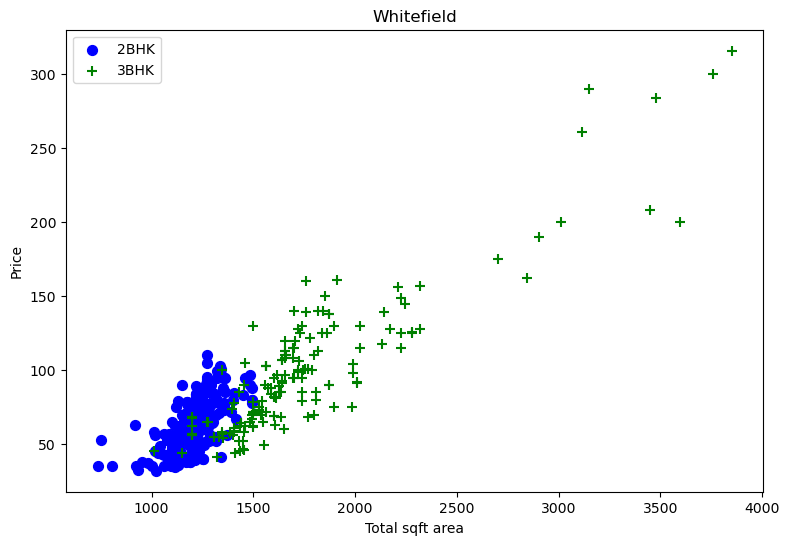

In [26]:
plot_scatter(dataf, "Whitefield")

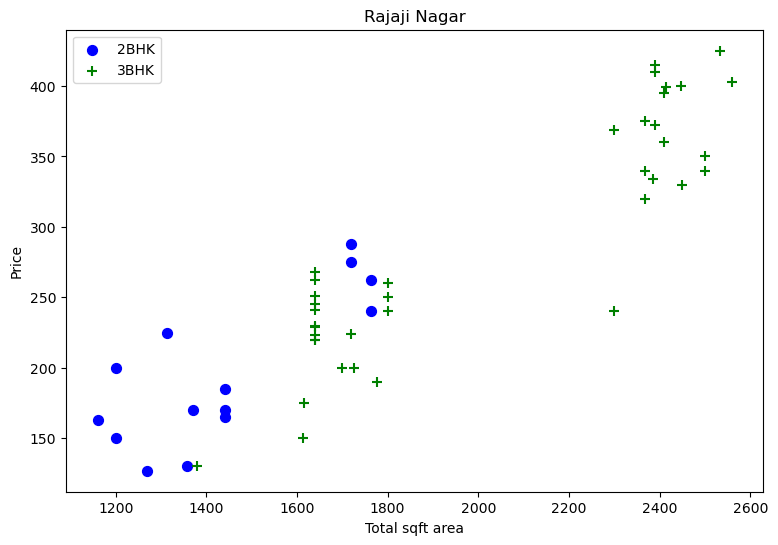

In [27]:
plot_scatter(dataf, "Rajaji Nagar")

In [28]:
def bhk_outlier(dataframe):
    exclude = np.array([])
    for loc, loc_df in dataframe.groupby('location'):
        stats = {}
        for bhk, bhk_df in loc_df.groupby('size'):
            stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('size'):
            stat = stats.get(bhk - 1)
            if stat and stat['count'] > 5:
                exclude = np.append(exclude, bhk_df[bhk_df['price_per_sqft'] < (stat['mean'])].index.values)
    return dataframe.drop(exclude, axis='index')

In [29]:
dataf = bhk_outlier(dataf)
dataf.shape

(7329, 6)

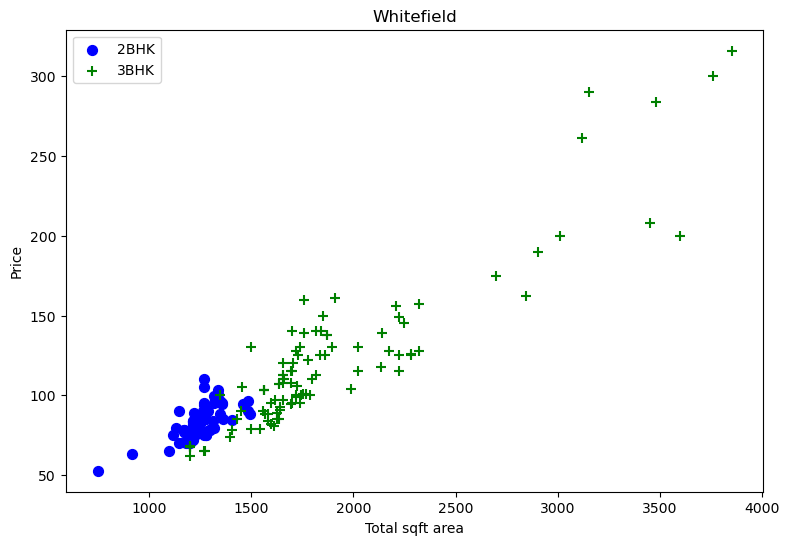

In [30]:
plot_scatter(dataf, "Whitefield")

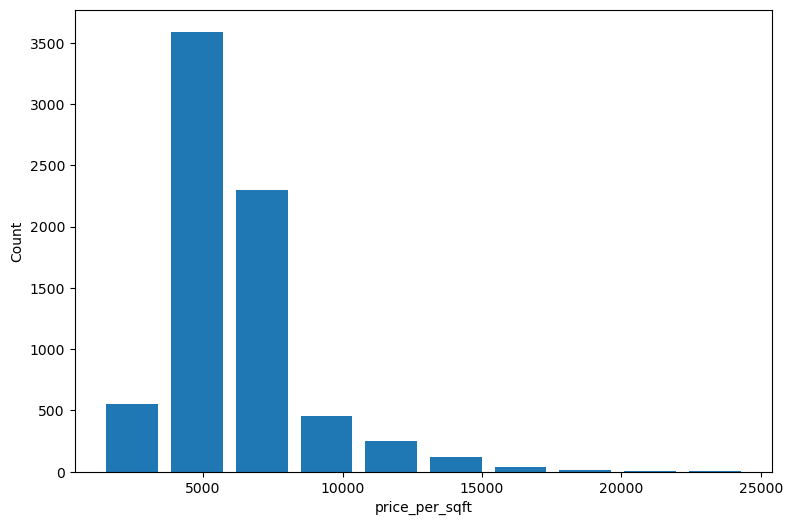

In [31]:
plt.hist(dataf['price_per_sqft'], rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('Count')
plt.show()

In [32]:
dataf[dataf['bath'] > 10]

,location,size,total_sqft,bath,price,price_per_sqft
5277,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8486,other,10,12000.0,12.0,525.0,4375.000000
8575,other,16,10000.0,16.0,550.0,5500.000000
9308,other,11,6000.0,12.0,150.0,2500.000000
9639,other,13,5425.0,13.0,275.0,5069.124424


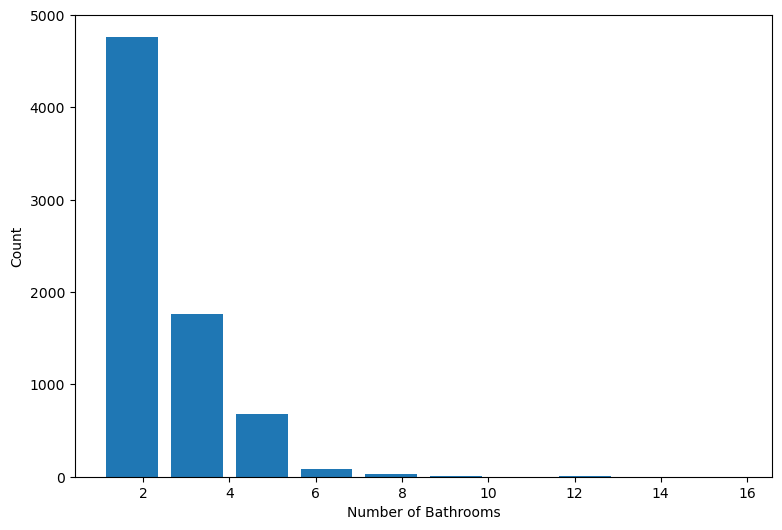

In [33]:
plt.hist(dataf['bath'], rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [34]:
dataf = dataf[dataf['bath'] < (dataf['size'] + 2)]
dataf.shape

(7251, 6)

In [35]:
dataf.drop(['price_per_sqft'], axis='columns', inplace=True)
dataf.head()

,location,size,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


In [74]:
dummies = pd.get_dummies(dataf['location'], dtype=int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
dataf = pd.concat([dataf, dummies.drop(['other'], axis='columns')], axis='columns')
dataf.head()

,location,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,1630.0,3.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,1875.0,2.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3,1200.0,2.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,1235.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
dataf.drop(['location'], axis='columns', inplace=True)
dataf.head()

,size,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
dataf.shape

(7251, 245)

In [84]:
feature = dataf.drop(['price'], axis='columns')
target = dataf['price']

In [86]:
target.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.2, random_state=10)

In [90]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [92]:
lin_model.fit(train_x, train_y)

LinearRegression()

In [94]:
lin_model.score(test_x, test_y)

0.8452277697873767

In [96]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), feature, target, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [106]:
def find_best_model(feature, target):
    models = {
        'linear_regression' : {
            'model' : Pipeline([
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())
            ]),
            'params' : {}
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, config in models.items():
        model = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        model.fit(feature, target)
        scores.append({
            'model' : model_name,
            'best_scores' : model.best_score_,
            'best_params' : model.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_scores', 'best_params'])

In [108]:
find_best_model(feature, target)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,model,best_scores,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.712440,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [153]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(feature.columns==location)[0][0]

    x = np.zeros(len(feature.columns))
    x[0] = bhk
    x[1] = sqft
    x[2] = bath
    if(loc_index >= 0):
        x[loc_index] = 1

    return lin_model.predict([x])[0]

In [155]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904676961567

In [157]:
predict_price('Indira Nagar', 1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484009767

In [159]:
import pickle

In [161]:
with open('bengaluru_home_price_pred.pickle', 'wb') as f:
    pickle.dump(lin_model, f)

In [163]:
import json

In [165]:
columns = {
    'data_columns' : [col.lower() for col in feature.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [167]:
feature.head()

,size,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
